Synthesize a discrete-time signal by using the IDFT in matrix notation for different values of N. Show the matrices W and K. Plot the signal synthesized.

**IDFT Signal Synthesis for N=10**


\begin{equation}
\mathbf{x}_\mu = [7, 2, 4, 3, 4, 5, 0, 0, 0, 0]^\text{T}
\end{equation}

W:
[[ 1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j]
 [ 1.        +0.00000000e+00j  0.80901699+5.87785252e-01j
   0.30901699+9.51056516e-01j -0.30901699+9.51056516e-01j
  -0.80901699+5.87785252e-01j -1.        +1.22464680e-16j
  -0.80901699-5.87785252e-01j -0.30901699-9.51056516e-01j
   0.30901699-9.51056516e-01j  0.80901699-5.87785252e-01j]
 [ 1.        +0.00000000e+00j  0.30901699+9.51056516e-01j
  -0.80901699+5.87785252e-01j -0.80901699-5.87785252e-01j
   0.30901699-9.51056516e-01j  1.        -2.44929360e-16j
   0.30901699+9.51056516e-01j -0.80901699+5.87785252e-01j
  -0.80901699-5.87785252e-01j  0.30901699-9.51056516e-01j]
 [ 1.        +0.00000000e+00j -0.30901699+9.51056516e-01j
  -0.80901699-5.87785252e-01j  0.80901699-5.87785252e-01j
   0.309

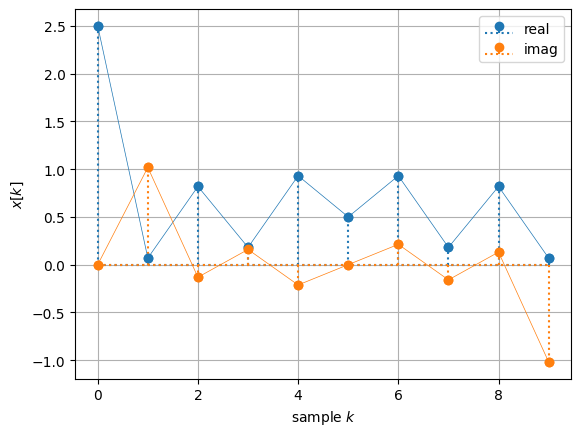

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.fft import fft, ifft

N=10

k = np.arange(N)

# all required DFT frequency indices, actually same entries like in k
mu = np.arange(N)

# set up matrices
K = np.outer(k, mu)  # get all possible entries k*mu in meaningful arrangement
W = np.exp(+1j * 2*np.pi/N * K)  # analysis matrix fors DFT

X_test = np.array([7, 2, 4, 3, 4, 5, 0, 0, 0, 0])
x_test = 1/N*W@X_test  # >= Python3.5
# x_test = 1/N * np.matmul(W, X_test)

plt.stem(k, np.real(x_test), label='real',
             markerfmt='C0o', basefmt='C0:', linefmt='C0:')
plt.stem(k, np.imag(x_test), label='imag',
             markerfmt='C1o', basefmt='C1:', linefmt='C1:')
# note that connecting the samples by lines is actually wrong, we
# use it anyway for more visual convenience
plt.plot(k, np.real(x_test), 'C0o-', lw=0.5)
plt.plot(k, np.imag(x_test), 'C1o-', lw=0.5)
plt.xlabel(r'sample $k$')
plt.ylabel(r'$x[k]$')
plt.legend()
plt.grid(True)

print('W:')
print(W)
print('K')
print(K)

# check if results are identical with numpy ifft package
print(np.allclose(ifft(X_test), x_test))
print('DC is 1 as expected: ', np.mean(x_test))